## TME 5 : RÉSEAUX

Etudiant 1 : Thien-Taï NGUYEN
Etudiant 2 : Sharane K.MURALI

#### 3. Degree distribution

In [1]:
#Import
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Convertit le fichier en entree en dictionnaire d'ensemble : plus pratique pour le calcul du coefficient de clustering

def dictreseau(fichier):
    reseau = {}

    with open(fichier, 'r') as fi:
        for line in fi:
            a, b = line.strip().split(',')
            if a not in reseau:
                reseau[a]=set()
            if b not in reseau:
                reseau[b]=set()
            reseau[a].add(b)
            reseau[b].add(a)

    return reseau

In [15]:
#Création des dico
reseau1 = dictreseau('reseau1.txt')
reseau2 = dictreseau('reseau2.txt')
reseau3 = dictreseau('reseau3.txt')

In [16]:
#Fonctions de distribution
def distribution(fichier_reseau):
    return np.unique(np.genfromtxt(fichier_reseau, delimiter=","),return_counts = True)

def distribution_str(fichier_reseau):
    return np.unique(np.genfromtxt(fichier_reseau, delimiter=",",dtype=str),return_counts = True)

In [17]:
uniq = distribution('reseau1.txt')
uniq2 = distribution('reseau2.txt')
uniq3 = distribution_str('reseau3.txt')

2. La distribution des degrés dans un graphe permet de connaitre le nombre de connexions que chaque noeud établit, permet de savoir si le reseau est scale free ou aléatoire, et en connaître ses propriétés en terme de comportement.

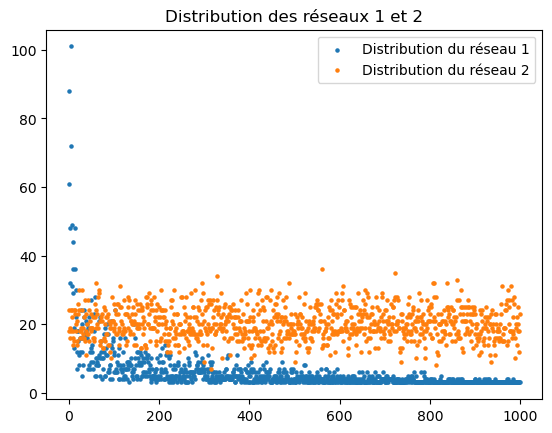

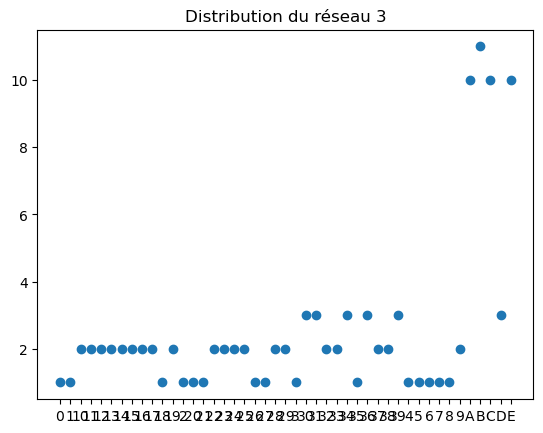

In [19]:
#Tracé de la distribution 
plt.title("Distribution des réseaux 1 et 2")
plt.scatter(uniq[0],uniq[1],s=5,label = "Distribution du réseau 1")
plt.scatter(uniq2[0],uniq2[1],s=5,label = "Distribution du réseau 2")
plt.legend()

plt.show()

plt.title("Distribution du réseau 3")
plt.scatter(uniq3[0],uniq3[1],label="distribution du réseau 3")
plt.show()



4. Un réseau scale-free est un réseau qui suit une loi de puissance : peu de noeuds auront beaucoup de connexions mais beaucoup d'autres en auront peu : ca correspond à la présence de hubs

Le réseau 1 peut être scale-free car on peut observer que les premiers noeuds ont un degré de distribution très élevé et que les suivants en ont beaucoup moins.  


Le réseau 2 est aléatoire car le degré de distribution des noeuds tend à rester au alentours de 20 connexions.

#### 4. Clustering coefficent

cc(A) = 2 * 0 / (10 * 9) = 0  
cc(B) = 2 * 4/(10 * 9) = 4/45 environ 0.7272   
cc(C) = 2 * 2/(11 * 10) = 2/55 environ 0.0444   
cc(D) = 2 * 1/(3 * 2) = 1/3  environ 0.3333  
cc(E) = 2 * 6/(10 * 9) = 2/15 environ 0.1333  

In [20]:
#Fonction de calcul du coefficient de clustering pour un noeud
#La compression du code était juste pour le fun.
def cc(reseau,noeud):
    
    #voisins contient les voisins du noeud à étudier : c'est un ensemble
    voisins = reseau[noeud]
    
    #le degré est calculé par le nombre de voisins
    d = len(voisins)

    #Comme il s'agit de calculer le coeffcient de clustering pour un noeud
    #On regarde le nombre de voisins qui sont présents parmi le voisin et le noeud
    #On fait une somme générale et on divise par le nombre de triangles possibles
    #Le if est a la fin comme opérateur ternaire
    return sum(len(voisins&reseau[i]) for i in voisins)/(d*(d-1)) if d>=2 else 0.0

In [21]:
print("Coefficient de clustering pour le noeud 0 du réseau 1 : ",cc(reseau1,'0'))

print("\nCoefficient de clustering pour le noeud 0 du réseau 2 : ",cc(reseau2,'0'))

print("\nCoefficient de clustering pour le noeud A du réseau 3 : ",cc(reseau3,'A'))
print("Coefficient de clustering pour le noeud B du réseau 3 : ",cc(reseau3,'B'))
print("Coefficient de clustering pour le noeud C du réseau 3 : ",cc(reseau3,'C'))
print("Coefficient de clustering pour le noeud D du réseau 3 : ",cc(reseau3,'D'))
print("Coefficient de clustering pour le noeud E du réseau 3 : ",cc(reseau3,'E'))

Coefficient de clustering pour le noeud 0 du réseau 1 :  0.01619644723092999

Coefficient de clustering pour le noeud 0 du réseau 2 :  0.018115942028985508

Coefficient de clustering pour le noeud A du réseau 3 :  0.0
Coefficient de clustering pour le noeud B du réseau 3 :  0.07272727272727272
Coefficient de clustering pour le noeud C du réseau 3 :  0.044444444444444446
Coefficient de clustering pour le noeud D du réseau 3 :  0.3333333333333333
Coefficient de clustering pour le noeud E du réseau 3 :  0.13333333333333333


In [22]:
#Fonction de calcul du coefficient de clustering moyen pour un réseau

def ccmoy(reseau):
    
    #ccm va contenir le coefficient de clustering moyen
    ccm = 0
    
    #On va dérouler le calcul du coefficient sur chaque noeud du réseau
    for noeud in reseau:
        
        #voisins contient les voisins du noeud à étudier : c'est un ensemble
        voisins = reseau[noeud]
        
        #le degré est calculé par le nombre de voisins
        d = len(voisins)
        
        #Comme il s'agit de calculer le coefficient de clustering pour un noeud puis pour le réseau
        #On regarde le nombre de voisins qui sont présents parmi le voisin et le noeud
        #On fait une somme générale et on divise par le nombre de triangles possibles
        #Le if est a la fin comme opérateur ternaire
        #On somme à ccm pour qu'il conserve la somme des coefficients des noeuds du réseau
        ccm += sum(len(voisins&reseau[i]) for i in voisins)/(d*(d-1)) if d>=2 else 0.0

    #ccm normailsé en retour
    return ccm/len(reseau)

In [23]:
print("Coefficient de clustering moyen du réesau 1 : ",ccmoy(reseau1))
print("Coefficient de clustering moyen du réseau 2 : ",ccmoy(reseau2))
print("Coefficient de clustering moyen du réseau 3 : ",ccmoy(reseau3))

Coefficient de clustering moyen du réesau 1 :  0.02700449048131582
Coefficient de clustering moyen du réseau 2 :  0.0203517467999495
Coefficient de clustering moyen du réseau 3 :  0.45741863075196415


Les réseaux 1 et 2 présentent un coefficient de clustering moyen du même ordre (0.020 et 0.027). Cela montre une interconnectivité entre les noeuds des réseaux qui sont présentes.  

Le réseau 3 présente un coefficient de clustering moyen de 0.45 soit 20 fois plus élevé que les réseuax précédents. Le faible nombre de noeuds dans le réseau 3 peut en être la cause mais aussi une interconnexion avec des passages parmi des hubs (A,B,C,D,E)  

#### 5. Betweness centrality

1. La betweenness centrality permet de mettre en évidence les noeuds qui sont fortements connectés aux autres. Ce sont les 'hubs'.

Le problème est que si le réseau est fortement centralisé et avec peu de noeud, la présence d'éléments perturbateurs peut limiter le fonctionnement. L'impact sur un noeud ayant une forte centralité est grand car il pénalisera tous ses connexions si les voisins n'ont pas un chemin de secours.

Une possibilité pour détecter des communautés serait de "combiner" le betweenness centrality et le clustering coefficient. La première mesure permettrait d'identifier les noueds "hubs" et la seconde pour aider à identifier le cluster liée à ce hub.

In [24]:
#On utilise l'algorithme de Djikstra pour calculer le chemin le plus court qui nous sera utile dans le calcul de la betweness centrality.
#Cet algo va nous retourner une liste ordonnée du chemin le plus court entre le noeud départ et le noeud arrivée

def dj_algo(reseau,depart,arrivee):
    
    #longueur est un dico dans lequel on va mettre à chaque noeud sa longueur au point de départ et on initialise pour chacun à infini
    longueur = {noeud : float('inf') for noeud in reseau}
    
    #longueur du noeud départ est 0
    longueur[depart] = 0
    
    #precedent est un dico dans lequel on va mettre le noeud précédent en valeur à un noeud qui sera clé : ici on met chacun à None
    precedent = {noeud : None for noeud in reseau}
    
    #nonpasse est une liste des noeuds du réseau pour savoir quel noeud n'a pas encore été vérifié
    nonpasse = list(reseau.keys())
    
    #le while va s'annuler quand nonpasse sera vide
    while nonpasse:
        
        #On choisit un noeud comme étant le minimum entre ceux dans nonpasse et sa distance minimale
        noeud = min(nonpasse, key=lambda x : longueur[x])
        
        #On retire le noeud car on est en train de l'étudier
        nonpasse.remove(noeud)
        
        #On parcourt sur les voisins du noeud en cours d'étude
        for voisin in reseau[noeud]:
            #On regarde si la longueur du voisin est superieur à la longueur du noeud courant(ici le poids est à 1)
            if longueur[voisin]>longueur[noeud]+1:
                #Mise à jour de la longueur du voisin
                longueur[voisin]=longueur[noeud]+1
                #On attribue le noeud actuel en tant que noeud précedent au voisin, qui permet le plus court chemin
                precedent[voisin] = noeud
    
    #Initialisation de la liste du chemin
    chemin = []
    
    #On considère le noeud d'arrivée comme le noeud initial
    noeud = arrivee
    #Parcours du dictionnaire precedent
    while noeud is not None:
        #Ajout du noeud au chemin
        chemin.append(noeud)
        #Changement du noeud actuel par le noeud précédent
        noeud = precedent[noeud]
        
    #On inverse la liste pour avoir le chemin dans le sens départ -> arrivée
    return chemin[::-1]

In [25]:
#Test de dj_algo pour le chemin du noeud 1 au noeud 32 dans le réseau3

print(dj_algo(reseau3,'1','32'))

['1', 'A', '9', 'B', '19', 'C', '28', 'D', '30', 'E', '32']


In [26]:
#Cette fonction calcule la betweenness centrality pour chaque noeud du reseau 
def bc(reseau):
    
    #bc est un dictionnaire qui contient le noeud en clé et sa betweeness centrality en valeur
    bc = {noeud:0 for noeud in reseau}
    
    #On fait une double boucle avec un depart et une arrivee
    for depart in reseau:
        for arrivee in reseau:
            #On elimine le cas ou les noeud deaprt et arrivee sont les mêmes
            if depart==arrivee:
                continue
            
            #On utilise l'algorithme de Djikstra pour obtenir le chemin le plsu court entre ces deux noeuds
            chemin = dj_algo(reseau,depart,arrivee)
            
            #On parcourt chaque noeud et on incrémente à 1 la betweenness centrality
            for noeud in chemin:
                bc[noeud]+=1
    
    #lon contient le nombre de noeuds
    lon=len(reseau)
    
    #Pour chaque noeud, on va normaliser la valeur de la betweeness centrality
    for noeud in bc:
        #On ne compte pas le noeud actuel dans la normalisation
        bc[noeud] = 2*bc[noeud]/((lon-1)*(lon-2))
        
    return bc

In [27]:
#Affichage de la betweenness centrality pour le réseau 3

bc(reseau3)

{'A': 0.8350951374207188,
 '0': 0.09302325581395349,
 '1': 0.09302325581395349,
 '2': 0.09302325581395349,
 '3': 0.09302325581395349,
 '4': 0.09302325581395349,
 '5': 0.09302325581395349,
 '6': 0.09302325581395349,
 '7': 0.09302325581395349,
 '8': 0.09302325581395349,
 '9': 0.8118393234672304,
 'B': 1.3847780126849893,
 '10': 0.09302325581395349,
 '11': 0.09302325581395349,
 '12': 0.09302325581395349,
 '13': 0.09302325581395349,
 '14': 0.09302325581395349,
 '15': 0.09302325581395349,
 '16': 0.09302325581395349,
 '17': 0.09302325581395349,
 '18': 0.09302325581395349,
 '19': 1.1141649048625792,
 'C': 1.4080338266384778,
 '20': 0.09302325581395349,
 '21': 0.09302325581395349,
 '22': 0.09302325581395349,
 '23': 0.09302325581395349,
 '24': 0.09302325581395349,
 '25': 0.09302325581395349,
 '26': 0.09302325581395349,
 '27': 0.09302325581395349,
 '28': 0.945031712473573,
 'D': 0.904862579281184,
 '29': 0.09302325581395349,
 '30': 0.8118393234672304,
 'E': 0.8224101479915433,
 '31': 0.093023255

PS : Nous ne savons pas si c'est la méthode d'implémentation du réseau qui poserait problème sur l'application de la fonction sur les réseaux 1 et 2. Le calcul est trèeeeeeees long mais on a pu voir qu'il y a bien une avancée dans le calcul avec des print.